In [46]:
import numpy as np
import matplotlib.pyplot as plt
import os
import re
import json
import pandas as pd
import seaborn as sns

In [38]:
# set the directory path
dir_path = './results'
print('dir_path' , dir_path)
df_small = pd.DataFrame(columns={
    'gl':[],
    'gh':[],
    'average_read_latency_per_page (ns)': [],
    'average_write_latency_per_page (ns)': [],
    '99.99%_read_latency_per_page (ns)': [],
    '99.99%_write_latency_per_page (ns)': [],
    '99.9999%_read_latency_per_page (ns)': [],
    '99.9999%_write_latency_per_page (ns)': [],
    'total_gc_time (ns)':[],
    'workload_completion_time (ns)':[],
    'erase.data.block':[],
    'user.page.moves':[]
})
df_medium = pd.DataFrame(columns={
    'gl':[],
    'gh':[],
    'average_read_latency_per_page (ns)': [],
    'average_write_latency_per_page (ns)': [],
    '99.99%_read_latency_per_page (ns)': [],
    '99.99%_write_latency_per_page (ns)': [],
    '99.9999%_read_latency_per_page (ns)': [],
    '99.9999%_write_latency_per_page (ns)': [],
    'total_gc_time (ns)':[],
    'workload_completion_time (ns)':[],
    'erase.data.block':[],
    'user.page.moves':[]
})


dir_path ./results


In [39]:
# loop through all the files and folders in the directory
for root, dirs, files in os.walk(dir_path):
    # record the folder name
#     print('Folder:', root)
    pattern = r"(\w+)-(\d+\.\d+)-(\d+\.\d+)"
    match = re.search(pattern, root)
    if match:
        name = match.group(1) # 'small'
        num1 = float(match.group(2)) # 0.8
        num2 = float(match.group(3)) # 0.3
#         print(name, num1, num2)
        
    # print the names of all the files in the folder
        for filename in files:
#             print('File:', filename)
            filepath = os.path.join(str(root), 'recorder.json')
        with open(filepath, 'r') as f:
            data = json.load(f)
#             print('json data',data.keys())
        avg_read_latency_per_page = data['average_read_latency_per_page (ns)']
        avg_write_latency_per_page = data['average_write_latency_per_page (ns)']
        p9999_read_latency_per_page = data['99.99%_read_latency_per_page (ns)']
        p9999_write_latency_per_page = data['99.99%_write_latency_per_page (ns)']
        p999999_read_latency_per_page = data['99.9999%_read_latency_per_page (ns)']
        p999999_write_latency_per_page = data['99.9999%_write_latency_per_page (ns)']
        total_gc_time = data['total_gc_time (ns)']
        workload_completion_time = data['workload_completion_time (ns)']

        gc_data = data['general_accumulator']['gc']
        erase_data_block = gc_data['erase.data.block']
        if 'user.page.moves' in gc_data:
            user_page_moves = gc_data['user.page.moves']
        else:
            user_page_moves = None
            
        # create a new row to add
        new_row = {'gl':num2,'gh':num1,'average_read_latency_per_page (ns)': avg_read_latency_per_page,
                   'average_write_latency_per_page (ns)': avg_write_latency_per_page, 
                  '99.99%_read_latency_per_page (ns)': p9999_read_latency_per_page,
                   '99.99%_write_latency_per_page (ns)': p9999_write_latency_per_page,
                   '99.9999%_read_latency_per_page (ns)': p999999_read_latency_per_page,
                   '99.9999%_write_latency_per_page (ns)': p999999_write_latency_per_page,
                   'total_gc_time (ns)':total_gc_time,
                   'workload_completion_time (ns)':workload_completion_time,
                   'erase.data.block':erase_data_block,
                   'user.page.moves':user_page_moves
                  }
        
        if name == 'small':
            df_small = df_small.append(new_row, ignore_index=True)
        elif name == 'medium':
            df_medium = df_medium.append(new_row, ignore_index=True)

#         print(avg_read_latency_per_page)
#         print(avg_write_latency_per_page)
#         print(p9999_read_latency_per_page)
#         print(p9999_write_latency_per_page)
#         print(p999999_read_latency_per_page)
#         print(p999999_write_latency_per_page)
#         print(total_gc_time)
#         print(workload_completion_time)
#         print(erase_data_block)
#         print(user_page_moves)
            

json data dict_keys(['general_accumulator', 'clean_func_valid_ratio_snapshot', 'gc_first_triggered_timestamp', 'average_read_latency_per_page (ns)', 'average_write_latency_per_page (ns)', '99.99%_read_latency_per_page (ns)', '99.99%_write_latency_per_page (ns)', '99.9999%_read_latency_per_page (ns)', '99.9999%_write_latency_per_page (ns)', 'total_gc_time (ns)', 'workload_completion_time (ns)'])
json data dict_keys(['general_accumulator', 'clean_func_valid_ratio_snapshot', 'gc_first_triggered_timestamp', 'average_read_latency_per_page (ns)', 'average_write_latency_per_page (ns)', '99.99%_read_latency_per_page (ns)', '99.99%_write_latency_per_page (ns)', '99.9999%_read_latency_per_page (ns)', '99.9999%_write_latency_per_page (ns)', 'total_gc_time (ns)', 'workload_completion_time (ns)'])
json data dict_keys(['general_accumulator', 'clean_func_valid_ratio_snapshot', 'gc_first_triggered_timestamp', 'average_read_latency_per_page (ns)', 'average_write_latency_per_page (ns)', '99.99%_read_lat

C:\Users\liufe\AppData\Local\Temp\ipykernel_25308\2549788955.py:50: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_small = df_small.append(new_row, ignore_index=True)
C:\Users\liufe\AppData\Local\Temp\ipykernel_25308\2549788955.py:50: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_small = df_small.append(new_row, ignore_index=True)
C:\Users\liufe\AppData\Local\Temp\ipykernel_25308\2549788955.py:50: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_small = df_small.append(new_row, ignore_index=True)
C:\Users\liufe\AppData\Local\Temp\ipykernel_25308\2549788955.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_medium = df_medium.a

json data dict_keys(['general_accumulator', 'clean_func_valid_ratio_snapshot', 'gc_first_triggered_timestamp', 'average_read_latency_per_page (ns)', 'average_write_latency_per_page (ns)', '99.99%_read_latency_per_page (ns)', '99.99%_write_latency_per_page (ns)', '99.9999%_read_latency_per_page (ns)', '99.9999%_write_latency_per_page (ns)', 'total_gc_time (ns)', 'workload_completion_time (ns)'])


C:\Users\liufe\AppData\Local\Temp\ipykernel_25308\2549788955.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_medium = df_medium.append(new_row, ignore_index=True)


In [40]:
df_small

,gl,gh,average_read_latency_per_page (ns),average_write_latency_per_page (ns),99.99%_read_latency_per_page (ns),99.99%_write_latency_per_page (ns),99.9999%_read_latency_per_page (ns),99.9999%_write_latency_per_page (ns),total_gc_time (ns),workload_completion_time (ns),erase.data.block,user.page.moves
0,0.3,0.8,208172.708045,313841.489246,1211200.0,1000000.0,1399966.16,2.478390e+06,5.568760e+09,2.560020e+10,3152.0,133954.0
1,0.1,0.6,214927.445078,313854.954974,1265600.0,1000000.0,1979928.56,2.494765e+06,9.794400e+08,2.101314e+10,2176.0,13490.0
2,0.2,0.7,228593.478632,313838.302143,1576000.0,1000000.0,1769971.80,2.478390e+06,2.491420e+09,2.252286e+10,2320.0,54034.0
3,0.6,0.8,194279.997875,311944.992406,1332400.0,1000000.0,1609992.48,2.519329e+06,1.194546e+10,3.162790e+10,3592.0,276661.0
4,0.2,0.8,236187.631393,313851.082557,1643200.0,1000000.0,1909968.04,2.527517e+06,4.625080e+09,2.465818e+10,2960.0,109901.0
5,0.4,0.6,214205.494189,313628.151531,1622400.0,1000000.0,1640000.00,2.470201e+06,1.723420e+09,2.171044e+10,2464.0,24683.0
6,0.5,0.7,218969.320897,313101.294315,1589200.0,1000000.0,1739998.12,2.380134e+06,5.288920e+09,2.518262e+10,2880.0,112592.0
7,0.3,0.6,205208.840637,313854.636969,1239600.0,1000000.0,1639979.32,2.471142e+06,1.465840e+09,2.149798e+10,2352.0,23718.0
8,0.3,0.4,207682.453444,313788.223047,1220000.0,1000000.0,1220000.00,2.127517e+06,4.392000e+08,2.046194e+10,2240.0,NaN
9,0.1,0.5,207682.453444,313855.632020,1220000.0,1000000.0,1220000.00,2.127517e+06,4.158000e+08,2.044774e+10,2192.0,NaN


In [41]:
df_medium

,gl,gh,average_read_latency_per_page (ns),average_write_latency_per_page (ns),99.99%_read_latency_per_page (ns),99.99%_write_latency_per_page (ns),99.9999%_read_latency_per_page (ns),99.9999%_write_latency_per_page (ns),total_gc_time (ns),workload_completion_time (ns),erase.data.block,user.page.moves
0,0.4,0.6,60695.693597,331089.105129,480000.0,1000000.0,3.701026e+06,8.424936e+06,1.111444e+10,1.120662e+11,12640.0,162287.0
1,0.5,0.6,60733.077759,331256.123241,500000.0,1000000.0,3.726181e+06,8.424936e+06,1.206598e+10,1.132288e+11,13120.0,182086.0
2,0.1,0.2,60632.645353,331349.288724,480000.0,1000000.0,3.726181e+06,8.424936e+06,7.669200e+09,1.089179e+11,11056.0,104511.0
3,0.2,0.4,60645.370366,331367.067187,480000.0,1000000.0,3.732470e+06,8.424936e+06,8.595540e+09,1.098535e+11,11472.0,117203.0
4,0.3,0.7,60609.394902,330747.288733,480000.0,1000000.0,3.732470e+06,8.424937e+06,1.772224e+10,1.183455e+11,13056.0,339163.0
5,0.1,0.8,61332.803891,331371.503204,500000.0,1000000.0,3.726181e+06,8.424936e+06,1.756334e+10,1.188596e+11,12458.0,368003.0
6,0.1,0.6,60984.033815,331358.690786,488000.0,1000000.0,3.763914e+06,8.424937e+06,1.027798e+10,1.115519e+11,13056.0,153322.0
7,0.3,0.4,60680.842867,331327.663005,480000.0,1000000.0,3.738758e+06,8.424936e+06,9.397520e+09,1.106105e+11,12096.0,128180.0
8,0.1,0.4,60659.990860,331165.319146,480000.0,1000000.0,3.729325e+06,8.424937e+06,8.895140e+09,1.099289e+11,11760.0,118674.0
9,0.4,0.8,60776.137612,331353.260750,490000.0,1000000.0,3.763914e+06,8.424937e+06,2.696392e+10,1.282357e+11,14540.0,606564.0


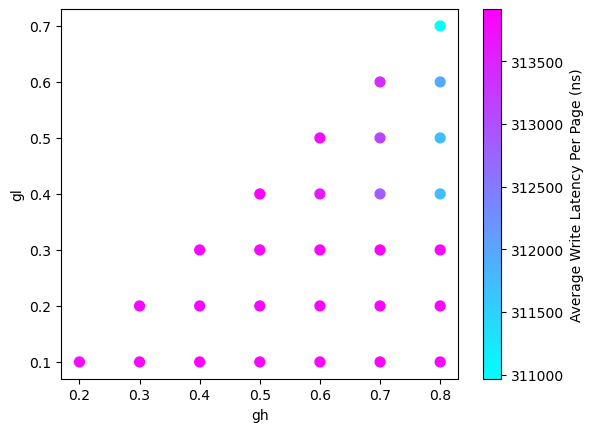

In [44]:
# create a scatter plot with 'Temperature' and 'Pressure' on the X and Y axes
plt.scatter(df_small['gh'], df_small['gl'], s=50, c=df_small['average_write_latency_per_page (ns)'], cmap='cool')
plt.xlabel('gh')
plt.ylabel('gl')
plt.colorbar(label='Average Write Latency Per Page (ns)')
plt.show()

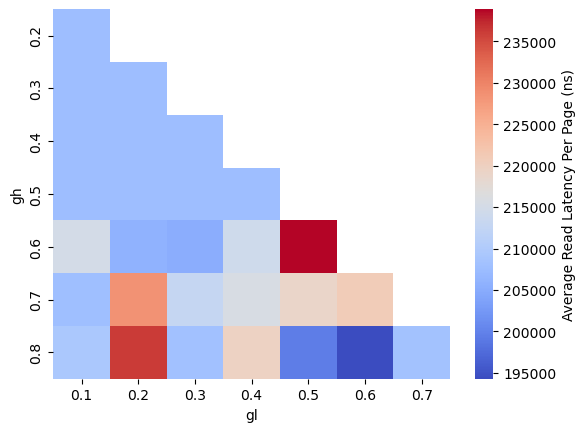

In [72]:
heatmap_data = df_small.pivot('gh', 'gl', 'average_read_latency_per_page (ns)')
sns.heatmap(heatmap_data, cmap='coolwarm', cbar_kws={'label': 'Average Read Latency Per Page (ns)'})
plt.show()

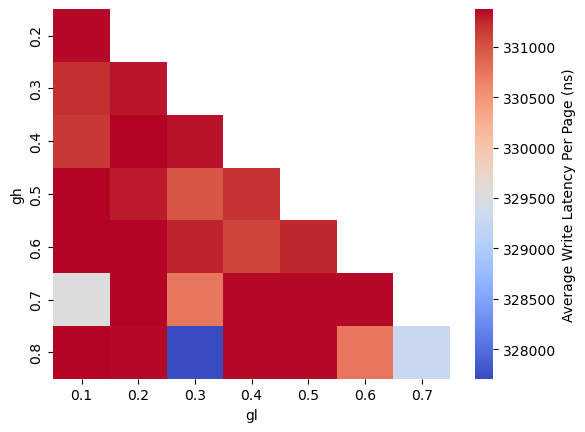

In [63]:
heatmap_data = df_medium.pivot('gh', 'gl', 'average_write_latency_per_page (ns)')
sns.heatmap(heatmap_data, cmap='coolwarm', cbar_kws={'label': 'Average Write Latency Per Page (ns)'})
plt.show()

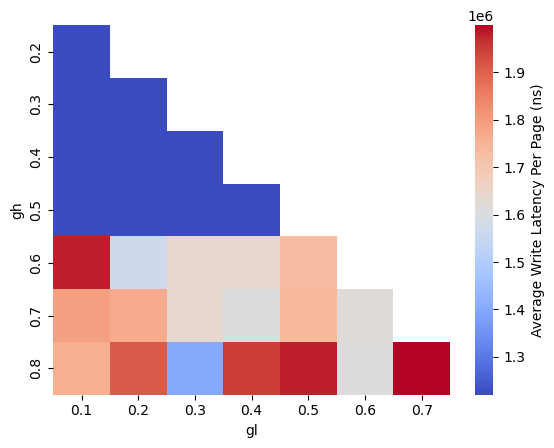

In [69]:
heatmap_data = df_small.pivot('gh', 'gl', '99.9999%_read_latency_per_page (ns)')
sns.heatmap(heatmap_data, cmap='coolwarm', cbar_kws={'label': 'Average Write Latency Per Page (ns)'})#,vmin = 0.95e6, vmax=1.05e6)
plt.show()